In [96]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import SimpleITK as sitk

In [97]:
csv_path = "/data/dataset_medium.csv"
dataset_path = "/data/ANHIR_Data"
parsed_path = "/data/ANHIR_Parsed_1024_Masks"
affine_path = "/data/ANHIR_Out_Aff_1024_Masks_TRANSFORMED"
deformable_path = "/data/ANHIR_Out_Aff_1024_Masks_TRANSFORMED_DEFORMABLE_EXP02"
case_id = "480"

In [98]:
def load_pair(case_id, dataset_path, load_masks=False):
    base_path = os.path.join(dataset_path, str(case_id))
    source_path = os.path.join(base_path, "source.mha")
    target_path = os.path.join(base_path, "target.mha")
    if load_masks:
        source_mask_path = os.path.join(base_path, "source_mask.mha")
        target_mask_path = os.path.join(base_path, "target_mask.mha")
    source_landmarks_path = os.path.join(base_path, "source_landmarks.csv")
    target_landmarks_path = os.path.join(base_path, "target_landmarks.csv")

    source = sitk.GetArrayFromImage(sitk.ReadImage(source_path))
    target = sitk.GetArrayFromImage(sitk.ReadImage(target_path))
    if load_masks:
        source_mask = sitk.GetArrayFromImage(sitk.ReadImage(source_mask_path))
        target_mask = sitk.GetArrayFromImage(sitk.ReadImage(target_mask_path))
    source_landmarks = pd.read_csv(source_landmarks_path).to_numpy()[:, 1:]
    try:
        status = "training"
        target_landmarks = pd.read_csv(target_landmarks_path).to_numpy()[:, 1:]
    except:
        status = "evaluation"
        target_landmarks = None
    if load_masks:
        return source, target, source_landmarks, target_landmarks, status, source_mask, target_mask
    else:
        return source, target, source_landmarks, target_landmarks, status,


In [99]:
# csv_file = pd.read_csv(csv_path)
# current_case = csv_file.loc[csv_file['Unnamed: 0'] == current_id].iloc[0]
# size = current_case['Image size [pixels]']
# diagonal = int(current_case['Image diagonal [pixels]'])
# y_size, x_size = int(size.split(",")[0][1:]), int(size.split(",")[1][:-1])
# source_path = current_case['Source image']
# target_path = current_case['Target image']
source_path = os.path.join(parsed_path, case_id, "source.mha")
target_path = os.path.join(parsed_path, case_id, "target.mha")
source_aff_path = os.path.join(affine_path, case_id, "source.mha")
target_aff_path = os.path.join(affine_path, case_id, "target.mha")
source_def_path = os.path.join(deformable_path, case_id, "source.mha")
target_def_path = os.path.join(deformable_path, case_id, "target.mha")
source_mask_path = source_path.replace("source", "source_mask")
source_landmarks_path = os.path.join(parsed_path, case_id, "source_landmarks.csv")
source_aff_landmarks_path = os.path.join(affine_path, case_id, "transformed_source_landmarks.csv")
source_def_landmarks_path = os.path.join(deformable_path, case_id, "transformed_source_landmarks.csv")
target_landmarks_path = os.path.join(parsed_path, case_id, "target_landmarks.csv")
source = sitk.GetArrayFromImage(sitk.ReadImage(source_path))
target = sitk.GetArrayFromImage(sitk.ReadImage(target_path))
source_aff = sitk.GetArrayFromImage(sitk.ReadImage(source_aff_path))
source_def = sitk.GetArrayFromImage(sitk.ReadImage(source_def_path))
source_mask = sitk.GetArrayFromImage(sitk.ReadImage(source_mask_path))
source_landmarks = pd.read_csv(source_landmarks_path).to_numpy()[:, 1:]
target_landmarks = pd.read_csv(target_landmarks_path).to_numpy()[:, 1:]
source_aff_landmarks = pd.read_csv(source_aff_landmarks_path).to_numpy()[:, 1:]
source_def_landmarks = pd.read_csv(source_def_landmarks_path).to_numpy()[:, 1:]

In [100]:
# Resize images to the same size before absolute difference
original_moving = cv2.resize(original_moving, (target.shape[1], target.shape[0]))
aff_registered_image = cv2.resize(aff_registered_image, (target.shape[1], target.shape[0]))
def_registered_image = cv2.resize(def_registered_image, (target.shape[1], target.shape[0]))

# Now you can perform absolute difference
original_diff = cv2.absdiff(original_moving, target)
aff_diff = cv2.absdiff(aff_registered_image, target)
def_diff = cv2.absdiff(def_registered_image, target)


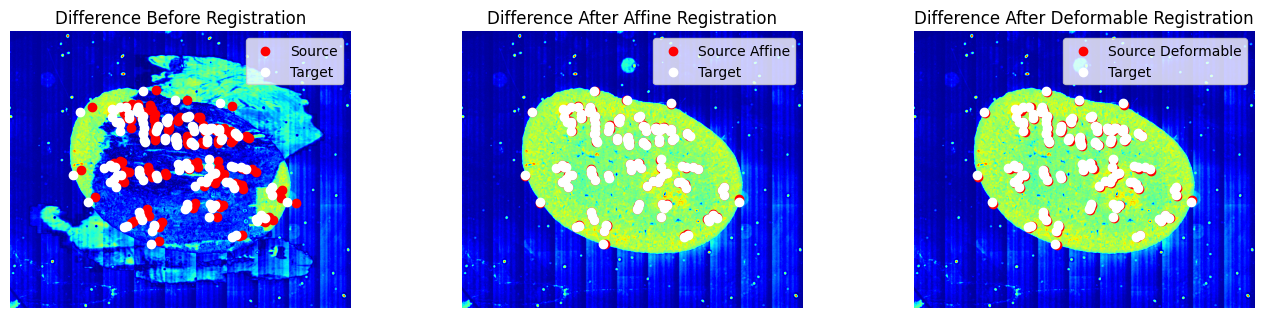

In [101]:
# Visualization
fig, axs = plt.subplots(1, 6, figsize=(15,10))

img1 = axs[0].imshow(original_diff, cmap='jet')
axs[0].scatter(source_landmarks[:, 0], source_landmarks[:, 1], c='red', label='Source')
axs[0].scatter(target_landmarks[:, 0], target_landmarks[:, 1], c='white', label='Target')  # Change color to white
axs[0].set_title("Difference Before Registration")
axs[0].axis('off')
axs[0].legend()

fig.colorbar(img1, ax=axs[0], cax=axs[1]) 
axs[1].set_visible(False)

img2 = axs[2].imshow(aff_diff, cmap='jet')
axs[2].scatter(source_aff_landmarks[:, 0], source_aff_landmarks[:, 1], c='red', label='Source Affine')
axs[2].scatter(target_landmarks[:, 0], target_landmarks[:, 1], c='white', label='Target')  # Change color to white
axs[2].set_title("Difference After Affine Registration")
axs[2].axis('off')
axs[2].legend()

fig.colorbar(img2, ax=axs[2], cax=axs[3]) 
axs[3].set_visible(False)

img3 = axs[4].imshow(def_diff, cmap='jet')
axs[4].scatter(source_def_landmarks[:, 0], source_def_landmarks[:, 1], c='red', label='Source Deformable')
axs[4].scatter(target_landmarks[:, 0], target_landmarks[:, 1], c='white', label='Target')  # Change color to white
axs[4].set_title("Difference After Deformable Registration")
axs[4].axis('off')
axs[4].legend()

fig.colorbar(img3, ax=axs[4], cax=axs[5]) 
axs[5].set_visible(False)

plt.tight_layout(w_pad=-10)
plt.show()
